In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [1]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 47 (delta 16), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [2]:
ls

Mecab-ko-for-Google-Colab/  sample_data/


In [3]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [4]:
ls

images/  install_mecab-ko_on_colab190912.sh  README.md


In [5]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.5MB/s 
     |████████████████████████████████| 2.7MB 44.4MB/s 
     |████████████████████████████████| 92kB 11.7MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2019-12-16 10:12:50--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.1, 18.205.93.0, 18.205.93.2, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?

In [6]:
import os, sys 
from google.colab import drive 
drive.mount('/content/mnt') 
nb_path = '/content/notebooks' 
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path) 
sys.path.insert(0, nb_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/mnt


In [7]:
  cd /content/mnt/My Drive/Colab Notebooks

/content/mnt/My Drive/Colab Notebooks


# 단어 임베딩에 ELMo적용해보기

http://doc.mindscale.kr/km/unstructured/11.html

In [2]:
!pip install tensorflow-hub

In [0]:
import tensorflow_hub as hub

In [0]:
import tensorflow as tf
from keras import backend as K

sess = tf.Session()
K.set_session(sess)

In [0]:
elmo = hub.Module("https://tfhub.dev/google/elmo/1", trainable=True)

In [0]:
sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())

In [0]:
import pandas as pd
train_data = pd.read_csv("model_kb_dacon01_trainset.csv")
test_data = pd.read_csv("public_test.csv")

In [0]:
from konlpy.tag import Mecab
mecab = Mecab()

In [0]:
train_data = pd.read_csv("model_kb_dacon01_trainset.csv")
test_data = pd.read_csv("public_test.csv")

In [62]:
train_data

,id,year_month,text,smishing,len,clear_text,len2
0,10,2017-01,(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...,1,917,(광고)Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다.당행상품의 자...,878
1,23,2017-01,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,0,749,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,743
2,26,2017-01,(광고)XXX추가 XXX품 특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...,1,399,(광고)추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영...,363
3,36,2017-01,(광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...,1,941,(광고)신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주...,914
4,45,2017-01,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,1,937,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,904
...,...,...,...,...,...,...,...
37401,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,1034,(광고)금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내고 있...,1013
37402,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1,911,(광고)나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부득이하...,893
37403,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1,474,(광고) 항상 (국민)은행을 이용해주셔서 감사합니다. 2018년 12월 신상품이 출...,444
37404,336370,2018-12,(광고)XXX가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준...,1,826,(광고)가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완...,814


In [63]:
test_data

,id,year_month,text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...
...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...


In [0]:
test_data_text = list(test_data['text'])

test_clear_text = []

for i in range(len(test_data_text)):
  test_clear_text.append(test_data_text[i].replace('XXX', ''))
test_data['clear_text'] = test_clear_text

In [98]:
test_data

,id,year_month,text,clear_text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...,고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난주 글...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...,긴급 안내 은행 가락동 지점 - 헬리오 기본 대출이자를 조합에서 납부...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같든데 ...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...,고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다. 기...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다. 고객님의 소중...
...,...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...,(광고) 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...,(광고)알림 신청하면 매일 현금 100만원! 부동산 리브온지금 부동산 리브온 App...


In [0]:
from keras.utils import np_utils
import numpy as np

y_train = []

for i in range(len(train_data['smishing'])):
  if train_data['smishing'].iloc[i] == 1:
    y_train.append([0, 1])
  elif train_data['smishing'].iloc[i] == 0:
    y_train.append([1, 0])

y_train = np.array(y_train)

In [0]:
y_train = []
y_val = []
for i in range(33665):
  if train_data['smishing'].iloc[i] == 1:
    y_train.append([0, 1])
  elif train_data['smishing'].iloc[i] == 0:
    y_train.append([1, 0])
for i in range(33665, len(train_data['smishing'])):
  if train_data['smishing'].iloc[i] == 1:
    y_val.append([0, 1])
  elif train_data['smishing'].iloc[i] == 0:
    y_val.append([1, 0])
y_train = np.array(y_train)
y_val = np.array(y_val)

In [0]:
def ELMoEmbedding(x):
  return elmo(tf.squeeze(tf.cast(x, tf.string)), as_dict=True, signature="default")["default"]

In [68]:
print(len(train_data['clear_text']))
n_of_train = len(train_data['clear_text']) * 0.9
n_of_val = len(train_data['clear_text']) * 0.1
print(n_of_train, n_of_val)

37406
33665.4 3740.6000000000004


In [0]:
X_data = list(train_data['clear_text'])

In [0]:
X_train = np.asarray(X_data[:33665])
X_val = np.asarray(X_data[33665:])

In [87]:
from keras.models import Model
from keras.layers import Dense, Lambda, Input

input_text = Input(shape=(1,), dtype=tf.string)
embedding_layer = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
hidden_layer = Dense(256, activation='relu')(embedding_layer)
output_layer = Dense(2, activation='sigmoid')(hidden_layer)
model3 = Model(inputs=[input_text], outputs=output_layer)
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [0]:
X_train2 = list(train_data['clear_text'])
X_train2 = np.asarray(X_train2)

In [88]:
history = model2.fit(X_train2, y_train, epochs=1, batch_size=32)#, validation_data=(X_val, y_val))

Epoch 1/1
37406/37406 [==============================] - 737s 20ms/step - loss: 0.0738 - acc: 0.9799


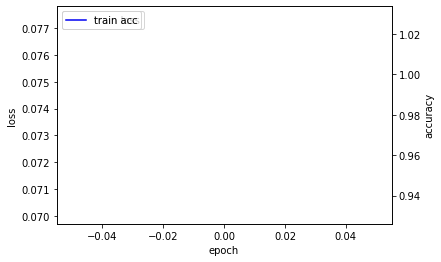

In [92]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
# loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
# acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [89]:
from keras.models import Model
from keras.layers import Dense, Lambda, Input

input_text = Input(shape=(1,), dtype=tf.string)
embedding_layer = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
hidden_layer = Dense(256, activation='relu')(embedding_layer)
output_layer = Dense(2, activation='sigmoid')(hidden_layer)
model4 = Model(inputs=[input_text], outputs=output_layer)
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [90]:
history2 = model4.fit(X_train2, y_train, epochs=3, batch_size=32)#, validation_data=(X_val, y_val))

Epoch 1/3
37406/37406 [==============================] - 738s 20ms/step - loss: 0.0983 - acc: 0.9694
Epoch 2/3
37406/37406 [==============================] - 734s 20ms/step - loss: 0.0417 - acc: 0.9891
Epoch 3/3
37406/37406 [==============================] - 737s 20ms/step - loss: 0.0323 - acc: 0.9917


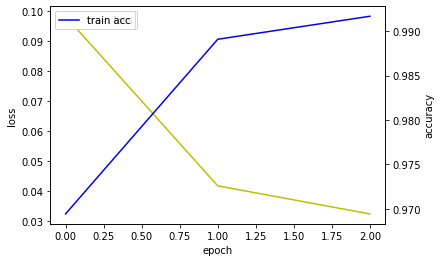

In [93]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history2.history['loss'], 'y', label='train loss')
# loss_ax.plot(history2.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history2.history['acc'], 'b', label='train acc')
# acc_ax.plot(history2.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [103]:
# tf.saved_model.save(model4, 'model_kb_dacon_7.h5')
model4.save("model_kb_dacon_7.h5")

TypeError: ignored

In [0]:
X_test = list(test_data['clear_text'])
X_test = np.asarray(X_test)

In [100]:
mypredict = model4.predict(X_test)
mypredict

array([[9.9530047e-01, 4.7262609e-03],
       [9.9321818e-01, 6.9309473e-03],
       [9.9996114e-01, 3.8951635e-05],
       ...,
       [9.9835503e-01, 1.2942255e-03],
       [9.9863052e-01, 1.6576350e-03],
       [4.6528947e-01, 5.8541805e-01]], dtype=float32)

In [0]:
submission_ids = list(test_data['id'])

my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

  
sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_07.csv", index=False, encoding='utf-8')

In [105]:
y_train2 = list(train_data['smishing'])
y_train2 = np.asarray(y_train2)
y_train2

array([1, 0, 1, ..., 1, 1, 0])

In [106]:
from keras.models import Model
from keras.layers import Dense, Lambda, Input

input_text = Input(shape=(1,), dtype=tf.string)
embedding_layer = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
hidden_layer = Dense(256, activation='relu')(embedding_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)
model5 = Model(inputs=[input_text], outputs=output_layer)
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [107]:
history3 = model5.fit(X_train2, y_train2, epochs=3, batch_size=32)#, validation_data=(X_val, y_val))

Epoch 1/3
37406/37406 [==============================] - 745s 20ms/step - loss: 0.1001 - acc: 0.9701
Epoch 2/3
37406/37406 [==============================] - 742s 20ms/step - loss: 0.0489 - acc: 0.9879
Epoch 3/3
37406/37406 [==============================] - 738s 20ms/step - loss: 0.0406 - acc: 0.9897


In [108]:
mypredict = model5.predict(X_test)
mypredict

array([[2.3921669e-02],
       [1.3818774e-01],
       [8.7171793e-05],
       ...,
       [2.2741556e-03],
       [3.4223835e-03],
       [5.2875835e-01]], dtype=float32)

In [110]:
data = pd.read_csv("kb_submission_01.csv")
data

,id,smishing
0,340000,0.000002
1,340001,0.000057
2,340002,0.000001
3,340003,0.000001
4,340004,0.000001
...,...,...
1621,341621,0.000002
1622,341622,0.000002
1623,341623,0.000002
1624,341624,0.000002


In [111]:
data['smishing2'] = mypredict
data

,id,smishing,smishing2
0,340000,0.000002,0.023922
1,340001,0.000057,0.138188
2,340002,0.000001,0.000087
3,340003,0.000001,0.000439
4,340004,0.000001,0.107863
...,...,...,...
1621,341621,0.000002,0.832051
1622,341622,0.000002,0.000785
1623,341623,0.000002,0.002274
1624,341624,0.000002,0.003422


# 여기까지는 너무 결과가 좋지않아 패스

# 오늘은 가장 첫번째 모델에 특수문자를 제거한 학습데이터를 학습시킨 모델과

# 데이터 18703개를 merge해서 만든 학습데이터를 학습시킨 모델 두가지를 사용해보려합니다.

In [0]:
import pandas as pd
train_data = pd.read_csv("model_kb_dacon01_trainset.csv")
test_data = pd.read_csv("public_test.csv")

In [9]:
train_data

,id,year_month,text,smishing,len,clear_text,len2
0,10,2017-01,(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...,1,917,(광고)Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다.당행상품의 자...,878
1,23,2017-01,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,0,749,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,743
2,26,2017-01,(광고)XXX추가 XXX품 특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...,1,399,(광고)추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영...,363
3,36,2017-01,(광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...,1,941,(광고)신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주...,914
4,45,2017-01,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,1,937,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,904
...,...,...,...,...,...,...,...
37401,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,1034,(광고)금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내고 있...,1013
37402,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1,911,(광고)나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부득이하...,893
37403,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1,474,(광고) 항상 (국민)은행을 이용해주셔서 감사합니다. 2018년 12월 신상품이 출...,444
37404,336370,2018-12,(광고)XXX가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준...,1,826,(광고)가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완...,814


In [10]:
test_data

,id,year_month,text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...
...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...


In [11]:
test_data_text = list(test_data['text'])

test_clear_text = []

for i in range(len(test_data_text)):
  test_clear_text.append(test_data_text[i].replace('XXX', ''))
test_data['clear_text'] = test_clear_text
test_data

,id,year_month,text,clear_text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...,고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난주 글...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...,긴급 안내 은행 가락동 지점 - 헬리오 기본 대출이자를 조합에서 납부...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같든데 ...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...,고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다. 기...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다. 고객님의 소중...
...,...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...,(광고) 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...,(광고)알림 신청하면 매일 현금 100만원! 부동산 리브온지금 부동산 리브온 App...


# 특수문자 제거

In [12]:
import re
train_clear_text = list(train_data['clear_text'])

train_clear_text2 = []

for text in train_clear_text:
  temp = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text)
  train_clear_text2.append(temp)
train_data['clear_text2'] = train_clear_text2
train_data

,id,year_month,text,smishing,len,clear_text,len2,clear_text2
0,10,2017-01,(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...,1,917,(광고)Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다.당행상품의 자...,878,광고Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다당행상품의 자격기준...
1,23,2017-01,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,0,749,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,743,시장동향0130 마감 기준KOSPI 208359pt081126 마감 기준 KOSPI...
2,26,2017-01,(광고)XXX추가 XXX품 특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...,1,399,(광고)추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영...,363,광고추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영업부...
3,36,2017-01,(광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...,1,941,(광고)신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주...,914,광고신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주지 ...
4,45,2017-01,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,1,937,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,904,광고안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA 수신...
...,...,...,...,...,...,...,...,...
37401,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,1034,(광고)금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내고 있...,1013,광고금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 이자를 내고 있는 분2월...
37402,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1,911,(광고)나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부득이하...,893,광고나의 한도금리를 알아보자금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 ...
37403,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1,474,(광고) 항상 (국민)은행을 이용해주셔서 감사합니다. 2018년 12월 신상품이 출...,444,광고 항상 국민은행을 이용해주셔서 감사합니다 2018년 12월 신상품이 출시되여서 ...
37404,336370,2018-12,(광고)XXX가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준...,1,826,(광고)가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완...,814,광고가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완화되...


In [13]:
test_clear_text = list(test_data['clear_text'])

test_clear_text2 = []

for text in test_clear_text:
  temp = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text)
  test_clear_text2.append(temp)
test_data['clear_text2'] = test_clear_text2
test_data

,id,year_month,text,clear_text,clear_text2
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...,고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난주 글...,고객님 안녕하세요 새롭게 시작하는 한 주 행복 가득하시길 기원합니다 지난주 글로벌 ...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...,긴급 안내 은행 가락동 지점 - 헬리오 기본 대출이자를 조합에서 납부...,긴급 안내 은행 가락동 지점 헬리오 기본 대출이자를 조합에서 납부했...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같든데 ...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다엊그제 새해가 시작된거같든데 벌...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...,고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다. 기...,고객님찾아온 행운을 잡으셨나요 못잡으셨다면 이번에 다시 잡으시길 기원합니다 기쁜날...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다. 고객님의 소중...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다 고객님의 소중한...
...,...,...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...,(광고) 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점...,광고 고객님안녕하십니까고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점 계장...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...,(광고)알림 신청하면 매일 현금 100만원! 부동산 리브온지금 부동산 리브온 App...,광고알림 신청하면 매일 현금 100만원 부동산 리브온지금 부동산 리브온 App에서 ...


In [14]:
from konlpy.tag import Okt
okt = Okt()

/content/notebooks/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [0]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [17]:
from tqdm import tqdm
X_train = []
for i in tqdm(range(len(train_data['clear_text2']))):
  temp_X = []
  temp_X = okt.morphs(train_data['clear_text2'].iloc[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_train.append(temp_X)

100%|██████████| 37406/37406 [31:06<00:00, 17.45it/s]


In [18]:
X_test = []
for i in tqdm(range(len(test_data['clear_text2']))):
  temp_X = []
  temp_X = okt.morphs(test_data['clear_text2'].iloc[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_test.append(temp_X)

100%|██████████| 1626/1626 [00:37<00:00, 35.31it/s]


In [19]:
print(X_train[:3])

[['광고', 'Ba', '고객', '님', '들다', '뒤', '엔', '언제나', '새롭다', '마음가짐', '새롭다', '준비', '당', '행', '상품', '자격', '기준', '심사', '기준', '완화', '되어다', '상품', '대해', '간단하다', '상품', '정보', '전달', '드리다', '수신', '을', '희망', '않다', '경우', '에는', '거부', '라는', '답장', '을', '주시', '면', 'KISA', '수신', '거부', '목록', '등록', '을', '시키다', '두', '번', '다시', '발송', '되다', '않다', '조치', '취', '해드리다', '신청', '방법', '터치', '문자', '로', '상담', '또는', '00시', '00분', '상담', '이라고', '답장', '을', '보내다', '전화', '주시', '면', '친절하다', '안전하다', '상담', '도움', '드리다', '카카오', '톡', '상담', '서비스', '시행', '중', 'citibankloan', '친구', '추가', '후', '상담', '신청', '이렇다', '분', '께', '권', '해드리다', '1', '시중', '은행권', '에서', '기존', '한도', '모두', '사용', '중', '이신', '분', '2', '기', '대출', '원리금', '균등', '방식', '인하다', '월', '불입', '금액', '부담스럽다', '분', '3', '총', '채무', '금액', '작다', '채', '무겁다', '많다', '관리', '안', '되다', '고객', '님', '들다', '말씀드리다', '높다', '금리', '때문', '힘들다', '느끼다', '때', '대출', '필요하다', '때', '언제나', '고객', '님', '들다', '뒤', '에서', '든든하다', '파트너', '로서', '드리다', '당', '행', '상품', '특징', '1', '당', '행', '거래', '없다', '진행', '가능', '2', 

In [20]:
print(X_test[:3])

[['고객', '님', '안녕하다', '새롭다', '시작', '주', '행복', '가득하다', '기원', '지난주', '글로벌', '증시', '파월', '밉다', '연', '준', '의장', '통화정책', '대해', '완화', '적', '인', '태도', '변화', '보이다', '것', '주초', '투자', '심리', '개선', '이어지다', '크다', '폭', '상승', '마감', '더불다', '밉다', '중', '차관', '급', '무역', '협상', '순', '조', '롭', '게', '진행', '되다', '점도', '긍정', '적', '이다', '원', '달러', '환율', '주간', '75원', '하락', '가운데', '외국인', '투자자', '국내', '증시', '순', '매수', '규모', '8천억', '을', '상회', '수급', '개선', '되다', '점도', '주목', '해보다', '필요', '있다', '금주', '시장', '미국', '금융', '주', '실적', '발표', '시작', '본격', '적', '인', '실적', '시즌', '진입', '되다', '지난주', '애플', '삼성', '전자', '등', '주요', '기업', '1분', '기', '실적', '전망', '하향', '조정', '있다', '점', '을', '참고', '다', '면', '올해', '글로벌', '성장', '둔화', '기', '조속', '에서', '기업', '순', '익', '감소', '추이', '관심', '있다', '살펴보다', '필요', '있다', '보이다', '주', '후반', '에는', '브렉', '시트', '영국', '하원', '표결', '예정', '되어다', '있다', '추워지다', '날씨', '건강', '유의', '좋다', '한주', '되다', '감사하다', '은행', '송도', '센터', '올리다'], ['긴급', '안내', '은행', '가락동', '지점', '헬리', '오', '기본', '대출', '이자', '조합', '에서', '납부', '2018년'

In [21]:
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)


Using TensorFlow backend.


In [0]:
X_test = tokenizer.texts_to_sequences(X_test)

In [0]:
import pickle

with open('tokenizer3.pickle', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [24]:
print(X_train[:3])

[[23, 2940, 11, 14, 223, 1653, 1368, 1254, 486, 3834, 486, 708, 191, 263, 2, 73, 134, 409, 134, 387, 95, 2, 176, 399, 2, 198, 608, 6, 71, 1, 135, 41, 68, 272, 20, 300, 107, 1, 37, 30, 1033, 71, 20, 510, 228, 1, 175, 484, 202, 322, 184, 7, 41, 273, 652, 76, 15, 51, 952, 36, 9, 10, 118, 459, 466, 10, 119, 107, 1, 121, 54, 37, 30, 188, 319, 10, 99, 6, 443, 439, 10, 70, 347, 60, 1319, 302, 48, 96, 10, 15, 620, 18, 110, 114, 76, 17, 205, 126, 22, 160, 13, 226, 65, 60, 392, 18, 19, 125, 5, 90, 104, 61, 108, 201, 683, 62, 403, 18, 21, 246, 86, 62, 245, 433, 1364, 57, 72, 92, 7, 11, 14, 223, 2014, 151, 4, 397, 1424, 1351, 258, 5, 161, 258, 1254, 11, 14, 223, 1653, 22, 553, 1726, 2007, 6, 191, 263, 2, 238, 17, 191, 263, 139, 58, 29, 12, 19, 205, 126, 44, 151, 13, 21, 109, 42, 167, 480, 130, 39, 29, 12, 53, 31, 57, 31, 25, 2, 52, 12, 123, 90, 104, 61, 1, 64, 45, 141, 579, 265, 428, 52, 12, 80, 220, 127, 261, 13, 28, 4, 202, 562, 191, 263, 2, 50, 17, 35, 722, 39, 2, 13, 46, 166, 704, 194, 34, 4, 

In [25]:
print(X_test[:3])

[[11, 14, 148, 486, 555, 276, 467, 784, 601, 1931, 845, 203, 2667, 654, 55, 1177, 2281, 1903, 176, 387, 94, 40, 5058, 2018, 525, 187, 11812, 341, 660, 769, 1707, 493, 706, 112, 267, 1660, 654, 60, 15746, 224, 536, 1460, 830, 1226, 6148, 483, 29, 7, 3606, 1471, 94, 27, 194, 814, 627, 2285, 233, 1179, 753, 1830, 565, 203, 830, 965, 1719, 1, 2488, 974, 769, 7, 3606, 2131, 916, 452, 3, 1894, 346, 419, 26, 276, 423, 1001, 555, 1555, 94, 40, 423, 1731, 1156, 7, 1931, 2273, 1977, 1533, 83, 544, 185, 1276, 125, 423, 900, 2473, 754, 3, 196, 1, 669, 133, 30, 482, 845, 2072, 839, 125, 6359, 22, 185, 830, 8626, 229, 1080, 199, 3, 2041, 452, 3, 525, 276, 2605, 272, 2468, 2455, 1876, 2356, 4287, 976, 95, 3, 2238, 864, 279, 371, 232, 1724, 7, 100, 8, 2855, 242, 89], [4725, 50, 8, 6313, 77, 9485, 880, 551, 5, 64, 7604, 22, 293, 291, 747, 1403, 1036, 1679, 95, 866, 2117, 444, 1403, 173, 320, 1403, 556, 338, 5, 64, 1223, 14, 207, 388, 293, 7, 51, 50, 17, 593, 877, 228, 8, 360, 196, 464, 337, 1147, 658, 

In [0]:
import matplotlib.pyplot as plt

제목의 최대 길이 : 380
제목의 평균 길이 :  207.82516173875848


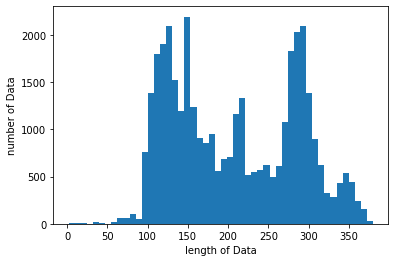

In [27]:
print("제목의 최대 길이 :" , max(len(l) for l in X_train))
print("제목의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

제목의 최대 길이 :  369
제목의 평균 길이 :  87.5350553505535


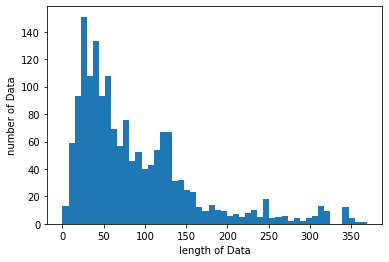

In [28]:
print("제목의 최대 길이 : ", max(len(l) for l in X_test))
print("제목의 평균 길이 : ", sum(map(len, X_test))/ len(X_test))
plt.hist([len(s) for s in X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [0]:
from keras.utils import np_utils
import numpy as np

y_train = []

for i in range(len(train_data['smishing'])):
  if train_data['smishing'].iloc[i] == 1:
    y_train.append([0, 1])
  elif train_data['smishing'].iloc[i] == 0:
    y_train.append([1, 0])

y_train = np.array(y_train)

In [0]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
max_len = 380 # 전체 데이터의 길이를 380로 맞춘다

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [32]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 33665 samples, validate on 3741 samples
Epoch 1/5





33665/33665 [==============================] - 640s 19ms/step - loss: 0.0280 - acc: 0.9912 - val_loss: 0.0064 - val_acc: 0.9968
Epoch 2/5
33665/33665 [==============================] - 643s 19ms/step - loss: 0.0017 - acc: 0.9996 - val_loss: 0.0070 - val_acc: 0.9989
Epoch 3/5
33665/33665 [==============================] - 644s 19ms/step - loss: 9.8353e-04 - acc: 0.9998 - val_loss: 0.0135 - val_acc: 0.9971
Epoch 4/5
33665/33665 [==============================] - 647s 19ms/step - loss: 1.7427e-04 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 0.9981
Epoch 5/5
33665/33665 [==============================] - 647s 19ms/step - loss: 8.1805e-04 - acc: 0.9997 - val_loss: 0.0057 - val_acc: 0.9987


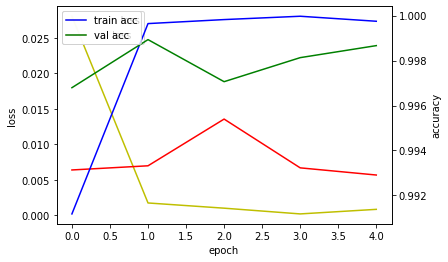

In [33]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
model.save("model_kb_dacon_8.h5")

In [52]:
mypredict = model.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_08.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_08.csv")['smishing']

0       4.470348e-07
1       1.335144e-05
2       2.384186e-07
3       1.609325e-06
4       6.258488e-07
            ...     
1621    5.632639e-06
1622    4.768372e-07
1623    5.066395e-07
1624    6.067397e-05
1625    8.178834e-01
Name: smishing, Length: 1626, dtype: float64

In [51]:
pd.read_csv("kb_submission_01.csv")['smishing']

0       0.000002
1       0.000057
2       0.000001
3       0.000001
4       0.000001
          ...   
1621    0.000002
1622    0.000002
1623    0.000002
1624    0.000002
1625    0.003900
Name: smishing, Length: 1626, dtype: float64

In [35]:
model2 = Sequential()
model2.add(Embedding(max_words, 100))
model2.add(LSTM(128))
model2.add(Dense(2, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/2
33665/33665 [==============================] - 647s 19ms/step - loss: 0.0243 - acc: 0.9941 - val_loss: 0.0109 - val_acc: 0.9960
Epoch 2/2
33665/33665 [==============================] - 653s 19ms/step - loss: 0.0010 - acc: 0.9998 - val_loss: 0.0056 - val_acc: 0.9981


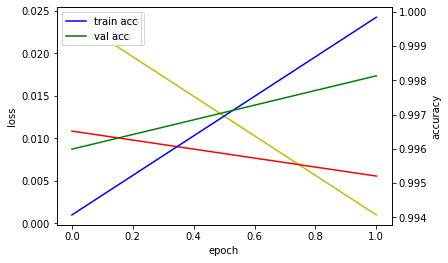

In [36]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history2.history['loss'], 'y', label='train loss')
loss_ax.plot(history2.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history2.history['acc'], 'b', label='train acc')
acc_ax.plot(history2.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
model2.save("model_kb_dacon_8_2.h5")

In [43]:
mypredict = model2.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_08_2.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_08_2.csv")

,id,smishing
0,340000,0.000011
1,340001,0.003532
2,340002,0.000007
3,340003,0.000025
4,340004,0.000013
...,...,...
1621,341621,0.000005
1622,341622,0.000022
1623,341623,0.000010
1624,341624,0.000009


In [38]:
model3 = Sequential()
model3.add(Embedding(max_words, 100))
model3.add(LSTM(128))
model3.add(Dense(2, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/5
33665/33665 [==============================] - 451s 13ms/step - loss: 0.0374 - acc: 0.9928 - val_loss: 0.0183 - val_acc: 0.9965
Epoch 2/5
33665/33665 [==============================] - 442s 13ms/step - loss: 0.0018 - acc: 0.9996 - val_loss: 0.0080 - val_acc: 0.9971
Epoch 3/5
33665/33665 [==============================] - 435s 13ms/step - loss: 5.8477e-05 - acc: 1.0000 - val_loss: 0.0106 - val_acc: 0.9979
Epoch 4/5
33665/33665 [==============================] - 437s 13ms/step - loss: 2.1220e-05 - acc: 1.0000 - val_loss: 0.0116 - val_acc: 0.9981
Epoch 5/5
33665/33665 [==============================] - 439s 13ms/step - loss: 1.1816e-05 - acc: 1.0000 - val_loss: 0.0120 - val_acc: 0.9981


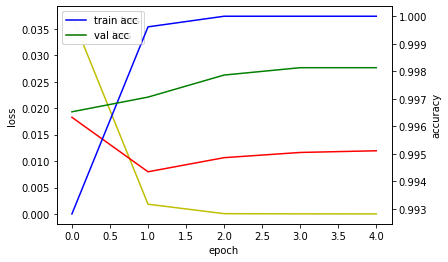

In [39]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history3.history['loss'], 'y', label='train loss')
loss_ax.plot(history3.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history3.history['acc'], 'b', label='train acc')
acc_ax.plot(history3.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
model3.save("model_kb_dacon_8_3.h5")

In [48]:
mypredict = model3.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_08_3.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_08_3.csv")

,id,smishing
0,340000,0.000003
1,340001,0.000052
2,340002,0.000005
3,340003,0.000006
4,340004,0.000003
...,...,...
1621,341621,0.000002
1622,341622,0.000014
1623,341623,0.000004
1624,341624,0.000002


In [50]:
test_data['clear_text2'].iloc[1625]

'광고  고객님 안녕하세요봉점 대리입니다 군인연금수급권자 대출상품이 출시돼 안내해드립니다군인연금수급권자에 한하여 연간 연금수령액의 최대 18배까지 대출신청이 가능합니다금리는 3대로 산정되어 저금리로 사용할 수 있습니다신규대출은 물론 타행대출 대환도 가능합니다 문의사항 있으시면 전화나 언제든 내점 부탁드립니다 감사합니다은행봉천동올림무료수신거부'

In [53]:
model4 = Sequential()
model4.add(Embedding(max_words, 100))
model4.add(LSTM(128))
model4.add(Dense(2, activation='sigmoid'))

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=5, batch_size=100, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/5
33665/33665 [==============================] - 380s 11ms/step - loss: 0.0879 - acc: 0.9784 - val_loss: 0.0106 - val_acc: 0.9984
Epoch 2/5
33665/33665 [==============================] - 378s 11ms/step - loss: 0.0021 - acc: 0.9996 - val_loss: 0.0062 - val_acc: 0.9973
Epoch 3/5
33665/33665 [==============================] - 375s 11ms/step - loss: 5.4343e-04 - acc: 0.9999 - val_loss: 0.0092 - val_acc: 0.9976
Epoch 4/5
33665/33665 [==============================] - 375s 11ms/step - loss: 6.9652e-04 - acc: 0.9999 - val_loss: 0.0070 - val_acc: 0.9979
Epoch 5/5
33665/33665 [==============================] - 376s 11ms/step - loss: 2.0030e-04 - acc: 0.9999 - val_loss: 0.0062 - val_acc: 0.9971


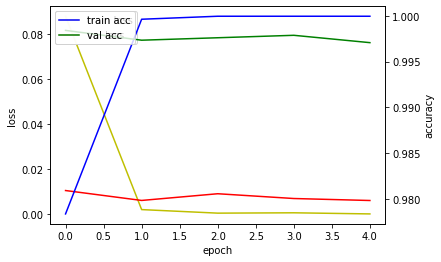

In [54]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history4.history['loss'], 'y', label='train loss')
loss_ax.plot(history4.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history4.history['acc'], 'b', label='train acc')
acc_ax.plot(history4.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
model4.save("model_kb_dacon_8_4.h5")

In [56]:
mypredict = model4.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_08_4.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_08_4.csv")

,id,smishing
0,340000,0.000042
1,340001,0.008810
2,340002,0.000043
3,340003,0.000064
4,340004,0.000049
...,...,...
1621,341621,0.000010
1622,341622,0.000086
1623,341623,0.000043
1624,341624,0.000027


In [57]:
test_data['clear_text2'].iloc[1]

' 긴급 안내  은행 가락동 지점   헬리오 기본    대출이자를 조합에서   납부했었으나 2018년 12월    25일부로 종료되었습니다     따라서 2019년 1월25일부터   매월 25일 중도금대출이자를    계약자님께서 직접 납부   하셔야 됩니다 방법안내 1 자동이체 등록    은행영업점 본인방문      신분증 지참     직원에게       대출계좌       대출이자 자동납부로       계좌간 자동이체등록       요청    인터넷뱅킹 공인인증서       로그인 후 자동이체 등록 2 자동이체 미등록 고객은    2019125일까지 가까운    은행영업점 방문하여    대출이자 납부 3 대출이자를 매월25일직접    납부하셔야 되는 사항으로    자동이체 등록을    간곡히 권장합니다 4 매월 25일 대출이자 미납시    대출부분에 대하여    연체이자 및 신용상의    불이익이 발생될 수     있사오니 이점 꼭     유의하시길 바랍니다 5 현재 기본대출을     보유하고고객님께만    해당되는 사항입니다 6 자동이체신청을 이미     등록 고객님은     해당사항 없습니다 7 감사합니다'

In [58]:
model5 = Sequential()
model5.add(Embedding(max_words, 100))
model5.add(LSTM(128))
model5.add(Dense(2, activation='sigmoid'))

model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history5 = model5.fit(X_train, y_train, epochs=5, batch_size=1000, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/5
33665/33665 [==============================] - 308s 9ms/step - loss: 0.3298 - acc: 0.9340 - val_loss: 0.0313 - val_acc: 0.9955
Epoch 2/5
33665/33665 [==============================] - 303s 9ms/step - loss: 0.0821 - acc: 0.9780 - val_loss: 0.0251 - val_acc: 0.9963
Epoch 3/5
33665/33665 [==============================] - 298s 9ms/step - loss: 0.0912 - acc: 0.9870 - val_loss: 0.0324 - val_acc: 0.9968
Epoch 4/5
33665/33665 [==============================] - 297s 9ms/step - loss: 0.0237 - acc: 0.9969 - val_loss: 0.0162 - val_acc: 0.9976
Epoch 5/5
33665/33665 [==============================] - 290s 9ms/step - loss: 0.0129 - acc: 0.9981 - val_loss: 0.0136 - val_acc: 0.9976


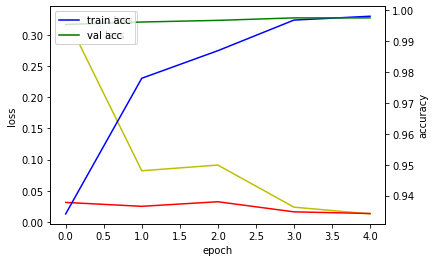

In [59]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history5.history['loss'], 'y', label='train loss')
loss_ax.plot(history5.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history5.history['acc'], 'b', label='train acc')
acc_ax.plot(history5.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
model5.save("model_kb_dacon_8_5.h5")

In [61]:
mypredict = model5.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_08_5.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_08_5.csv")

,id,smishing
0,340000,0.001962
1,340001,0.016792
2,340002,0.002537
3,340003,0.002210
4,340004,0.001988
...,...,...
1621,341621,0.003816
1622,341622,0.002643
1623,341623,0.003338
1624,341624,0.004744


In [63]:
model6 = Sequential()
model6.add(Embedding(max_words, 100))
model6.add(LSTM(128))
model6.add(Dense(2, activation='sigmoid'))

model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history6 = model6.fit(X_train, y_train, epochs=10, batch_size=1000, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/10
33665/33665 [==============================] - 295s 9ms/step - loss: 0.4123 - acc: 0.8660 - val_loss: 0.0662 - val_acc: 0.9884
Epoch 2/10
33665/33665 [==============================] - 297s 9ms/step - loss: 0.0247 - acc: 0.9961 - val_loss: 0.0232 - val_acc: 0.9955
Epoch 3/10
33665/33665 [==============================] - 297s 9ms/step - loss: 0.0176 - acc: 0.9968 - val_loss: 0.0231 - val_acc: 0.9957
Epoch 4/10
33665/33665 [==============================] - 297s 9ms/step - loss: 0.0088 - acc: 0.9988 - val_loss: 0.0212 - val_acc: 0.9955
Epoch 5/10
33665/33665 [==============================] - 293s 9ms/step - loss: 0.0049 - acc: 0.9992 - val_loss: 0.0180 - val_acc: 0.9963
Epoch 6/10
33665/33665 [==============================] - 292s 9ms/step - loss: 0.2789 - acc: 0.9581 - val_loss: 1.8025 - val_acc: 0.6052
Epoch 7/10
33665/33665 [==============================] - 293s 9ms/step - loss: 0.1383 - acc: 0.9825 - val_loss: 0.0612 - v

In [64]:
mypredict = model6.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_08_6.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_08_6.csv")

,id,smishing
0,340000,0.000795
1,340001,0.010612
2,340002,0.001269
3,340003,0.000782
4,340004,0.000859
...,...,...
1621,341621,0.000585
1622,341622,0.001150
1623,341623,0.001151
1624,341624,0.001585


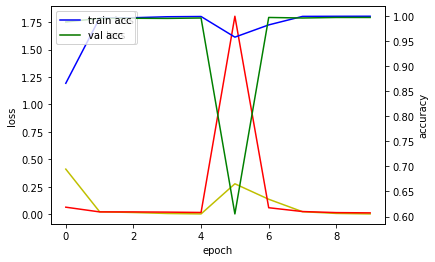

In [65]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history6.history['loss'], 'y', label='train loss')
loss_ax.plot(history6.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history6.history['acc'], 'b', label='train acc')
acc_ax.plot(history6.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
model7 = Sequential()
model7.add(Embedding(max_words, 100))
model7.add(LSTM(128))
model7.add(Dense(2, activation='sigmoid'))

model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history7 = model7.fit(X_train, y_train, epochs=10, batch_size=1000, validation_split=0.1)

# Mecab으로도 해보자

In [0]:
train_data_2 = pd.read_csv("model_kb_dacon01_trainset.csv")
test_data_2 = pd.read_csv("public_test.csv")

In [17]:
import re
train_clear_text = list(train_data_2['clear_text'])

train_clear_text2 = []

for text in train_clear_text:
  temp = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text)
  train_clear_text2.append(temp)
train_data_2['clear_text2'] = train_clear_text2
train_data_2

,id,year_month,text,smishing,len,clear_text,len2,clear_text2
0,10,2017-01,(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...,1,917,(광고)Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다.당행상품의 자...,878,광고Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다당행상품의 자격기준...
1,23,2017-01,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,0,749,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,743,시장동향0130 마감 기준KOSPI 208359pt081126 마감 기준 KOSPI...
2,26,2017-01,(광고)XXX추가 XXX품 특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...,1,399,(광고)추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영...,363,광고추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영업부...
3,36,2017-01,(광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...,1,941,(광고)신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주...,914,광고신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주지 ...
4,45,2017-01,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,1,937,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,904,광고안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA 수신...
...,...,...,...,...,...,...,...,...
37401,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,1034,(광고)금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내고 있...,1013,광고금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 이자를 내고 있는 분2월...
37402,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1,911,(광고)나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부득이하...,893,광고나의 한도금리를 알아보자금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 ...
37403,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1,474,(광고) 항상 (국민)은행을 이용해주셔서 감사합니다. 2018년 12월 신상품이 출...,444,광고 항상 국민은행을 이용해주셔서 감사합니다 2018년 12월 신상품이 출시되여서 ...
37404,336370,2018-12,(광고)XXX가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준...,1,826,(광고)가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완...,814,광고가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완화되...


In [0]:
train_data_2.to_csv("model_kb_dacon02_trainset.csv")

In [19]:
clear_text = list(test_data_2['text'])

clear_text2 = []

for text in clear_text:
  clear_text2.append(text.replace("XXX", ""))
test_data_2['clear_text'] = clear_text2
test_data_2

,id,year_month,text,clear_text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...,고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난주 글...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...,긴급 안내 은행 가락동 지점 - 헬리오 기본 대출이자를 조합에서 납부...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같든데 ...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...,고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다. 기...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다. 고객님의 소중...
...,...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...,(광고) 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...,(광고)알림 신청하면 매일 현금 100만원! 부동산 리브온지금 부동산 리브온 App...


In [20]:
test_clear_text = list(test_data_2['clear_text'])

test_clear_text2 = []

for text in test_clear_text:
  temp = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text)
  test_clear_text2.append(temp)
test_data_2['clear_text2'] = test_clear_text2
test_data_2

,id,year_month,text,clear_text,clear_text2
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...,고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난주 글...,고객님 안녕하세요 새롭게 시작하는 한 주 행복 가득하시길 기원합니다 지난주 글로벌 ...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...,긴급 안내 은행 가락동 지점 - 헬리오 기본 대출이자를 조합에서 납부...,긴급 안내 은행 가락동 지점 헬리오 기본 대출이자를 조합에서 납부했...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같든데 ...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다엊그제 새해가 시작된거같든데 벌...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...,고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다. 기...,고객님찾아온 행운을 잡으셨나요 못잡으셨다면 이번에 다시 잡으시길 기원합니다 기쁜날...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다. 고객님의 소중...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다 고객님의 소중한...
...,...,...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...,(광고) 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점...,광고 고객님안녕하십니까고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점 계장...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...,(광고)알림 신청하면 매일 현금 100만원! 부동산 리브온지금 부동산 리브온 App...,광고알림 신청하면 매일 현금 100만원 부동산 리브온지금 부동산 리브온 App에서 ...


In [0]:
from konlpy.tag import Mecab
mecab = Mecab()

In [22]:
from tqdm import tqdm
X_train = []
for i in tqdm(range(len(train_data_2['clear_text2']))):
  temp_X = []
  temp_X = mecab.morphs(train_data_2['clear_text2'].iloc[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_train.append(temp_X)

100%|██████████| 37406/37406 [01:03<00:00, 587.41it/s]


In [23]:
X_test = []
for i in tqdm(range(len(test_data_2['clear_text2']))):
  temp_X = []
  temp_X = mecab.morphs(test_data_2['clear_text2'].iloc[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_test.append(temp_X)

100%|██████████| 1626/1626 [00:01<00:00, 1341.05it/s]


In [24]:
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

import pickle

with open('tokenizer3_1.pickle', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

Using TensorFlow backend.


문자의 최대 길이 : 469
문자의 평균 길이 :  249.57512163823986


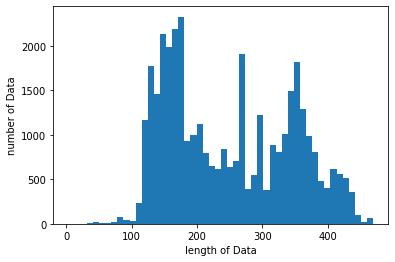

In [26]:
import matplotlib.pyplot as plt

print("문자의 최대 길이 :" , max(len(l) for l in X_train))
print("문자의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

문자의 최대 길이 :  390
문자의 평균 길이 :  104.48339483394834


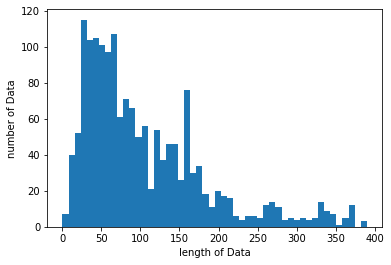

In [27]:
print("문자의 최대 길이 : ", max(len(l) for l in X_test))
print("문자의 평균 길이 : ", sum(map(len, X_test))/ len(X_test))
plt.hist([len(s) for s in X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [0]:
from keras.utils import np_utils
import numpy as np

y_train = []

for i in range(len(train_data_2['smishing'])):
  if train_data_2['smishing'].iloc[i] == 1:
    y_train.append([0, 1])
  elif train_data_2['smishing'].iloc[i] == 0:
    y_train.append([1, 0])

y_train = np.array(y_train)

In [0]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
max_len = 469 # 전체 데이터의 길이를 469로 맞춘다

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [81]:
model8 = Sequential()
model8.add(Embedding(max_words, 100))
model8.add(LSTM(128))
model8.add(Dense(2, activation='sigmoid'))

model8.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history8 = model8.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/5
33665/33665 [==============================] - 798s 24ms/step - loss: 0.0388 - acc: 0.9890 - val_loss: 0.0247 - val_acc: 0.9933
Epoch 2/5
33665/33665 [==============================] - 778s 23ms/step - loss: 0.0020 - acc: 0.9996 - val_loss: 0.0122 - val_acc: 0.9971
Epoch 3/5
33665/33665 [==============================] - 788s 23ms/step - loss: 1.1515e-04 - acc: 1.0000 - val_loss: 0.0094 - val_acc: 0.9989
Epoch 4/5
33665/33665 [==============================] - 786s 23ms/step - loss: 9.3209e-06 - acc: 1.0000 - val_loss: 0.0099 - val_acc: 0.9989
Epoch 5/5
33665/33665 [==============================] - 786s 23ms/step - loss: 3.5942e-06 - acc: 1.0000 - val_loss: 0.0098 - val_acc: 0.9989


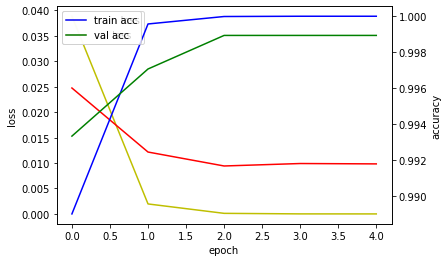

In [82]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history8.history['loss'], 'y', label='train loss')
loss_ax.plot(history8.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history8.history['acc'], 'b', label='train acc')
acc_ax.plot(history8.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [83]:
mypredict = model8.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_08_8.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_08_8.csv")

,id,smishing
0,340000,8.642673e-07
1,340001,8.493662e-06
2,340002,5.722937e-02
3,340003,1.692772e-05
4,340004,8.344650e-07
...,...,...
1621,341621,5.066395e-07
1622,341622,1.311302e-06
1623,341623,4.440546e-06
1624,341624,7.524018e-07


In [88]:
pd.read_csv("kb_submission_08_8.csv")['smishing'][1]

8.493661880493164e-06

In [31]:
model9 = Sequential()
model9.add(Embedding(max_words, 100))
model9.add(LSTM(128))
model9.add(Dense(2, activation='sigmoid'))

model9.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history9 = model9.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.1)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 33665 samples, validate on 3741 samples
Epoch 1/3





33665/33665 [==============================] - 776s 23ms/step - loss: 0.0291 - acc: 0.9912 - val_loss: 0.0060 - val_acc: 0.9981
Epoch 2/3
33665/33665 [==============================] - 775s 23ms/step - loss: 0.0024 - acc: 0.9995 - val_loss: 0.0305 - val_acc: 0.9925
Epoch 3/3
33665/33665 [==============================] - 772s 23ms/step - loss: 9.4923e-04 - acc: 0.9997 - val_loss: 0.0121 - val_acc: 0.9973


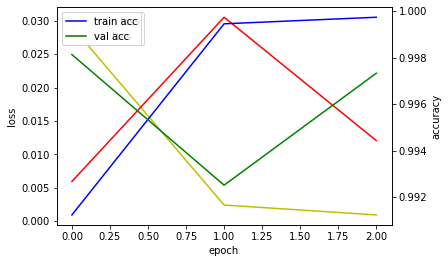

In [32]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history9.history['loss'], 'y', label='train loss')
loss_ax.plot(history9.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history9.history['acc'], 'b', label='train acc')
acc_ax.plot(history9.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
model9.save("model_kb_dacon_8_9.h5")

In [35]:
mypredict = model9.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_08_9.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_08_9.csv")

,id,smishing
0,340000,0.000021
1,340001,0.004792
2,340002,0.000182
3,340003,0.000026
4,340004,0.000012
...,...,...
1621,341621,0.000019
1622,341622,0.000043
1623,341623,0.000218
1624,341624,0.000046


In [40]:
pd.read_csv("kb_submission_01.csv")

,id,smishing
0,340000,0.000002
1,340001,0.000057
2,340002,0.000001
3,340003,0.000001
4,340004,0.000001
...,...,...
1621,341621,0.000002
1622,341622,0.000002
1623,341623,0.000002
1624,341624,0.000002


In [36]:
model10 = Sequential()
model10.add(Embedding(max_words, 100))
model10.add(LSTM(128))
model10.add(Dense(2, activation='sigmoid'))

model10.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history10 = model10.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/2
33665/33665 [==============================] - 771s 23ms/step - loss: 0.0346 - acc: 0.9898 - val_loss: 0.0087 - val_acc: 0.9979
Epoch 2/2
33665/33665 [==============================] - 778s 23ms/step - loss: 0.0026 - acc: 0.9993 - val_loss: 0.0036 - val_acc: 0.9984


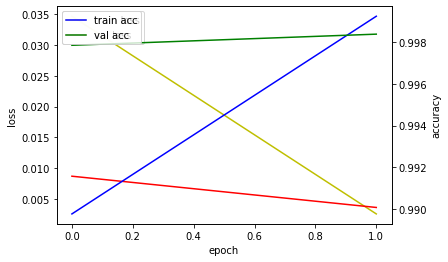

In [37]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history10.history['loss'], 'y', label='train loss')
loss_ax.plot(history10.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history10.history['acc'], 'b', label='train acc')
acc_ax.plot(history10.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
model10.save("model_kb_dacon_8_10.h5")

In [45]:
mypredict = model10.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_08_10.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_08_10.csv")

,id,smishing
0,340000,0.000012
1,340001,0.000945
2,340002,0.000022
3,340003,0.000010
4,340004,0.000009
...,...,...
1621,341621,0.000035
1622,341622,0.000010
1623,341623,0.000236
1624,341624,0.000064


In [41]:
model11 = Sequential()
model11.add(Embedding(max_words, 100))
model11.add(LSTM(128))
model11.add(Dense(2, activation='sigmoid'))

model11.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history11 = model11.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/1
33665/33665 [==============================] - 780s 23ms/step - loss: 0.0286 - acc: 0.9930 - val_loss: 0.0077 - val_acc: 0.9981


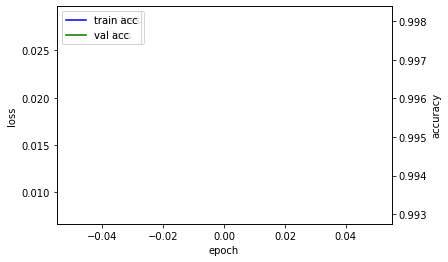

In [42]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history11.history['loss'], 'y', label='train loss')
loss_ax.plot(history11.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history11.history['acc'], 'b', label='train acc')
acc_ax.plot(history11.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
model11.save("model_kb_dacon_8_11.h5")

In [44]:
mypredict = model11.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_08_11.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_08_11.csv")

,id,smishing
0,340000,0.000121
1,340001,0.004335
2,340002,0.018480
3,340003,0.000170
4,340004,0.000092
...,...,...
1621,341621,0.000107
1622,341622,0.002297
1623,341623,0.000977
1624,341624,0.000179
